<a href="https://colab.research.google.com/github/JeyyGit/Jeyy-Bot/blob/main/week_6/K_Means_Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd


# Menghubungkan Google Drive ke sesi Google Colab
drive.mount('/content/drive')

# Menentukan path file CSV yang akan digunakan
data = '/content/drive/My Drive/Dataset/Mall_Customers.csv'

# Mengimpor data dari file CSV yang telah ditentukan sebelumnya menggunakan Pandas, dan menyimpannya dalam sebuah DataFrame
df = pd.read_csv(data)

# Menampilkan lima baris pertama dari DataFrame yang baru saja dimuat
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Menggunakan metode 'rename' pada DataFrame Pandas untuk mengubah nama kolom 'Annual Income (k$)' menjadi 'Annual Income' dan 'Spending Score (1-100)' menjadi 'Spending Score'
df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace=True)

In [4]:
# Menggunakan metode 'drop' pada DataFrame Pandas untuk menghapus kolom 'Gender' dan 'CustomerID'
df.drop(['Gender', 'CustomerID'], axis=1, inplace=True)

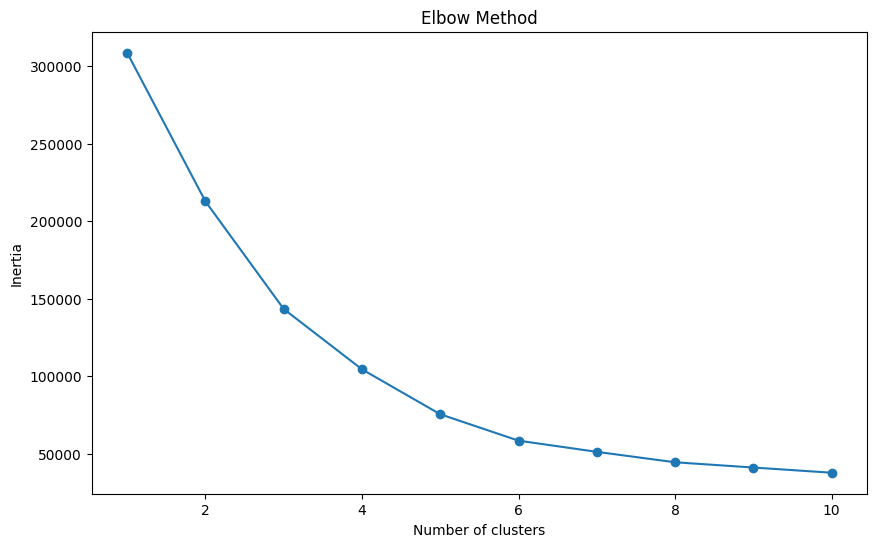

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membuat list kosong untuk menampung nilai inersia
inertia = []

# Mengambil kolom yang diperlukan
X = df[['Age', 'Annual Income', 'Spending Score']]

# Melakukan perulangan untuk nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan metode elbow
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

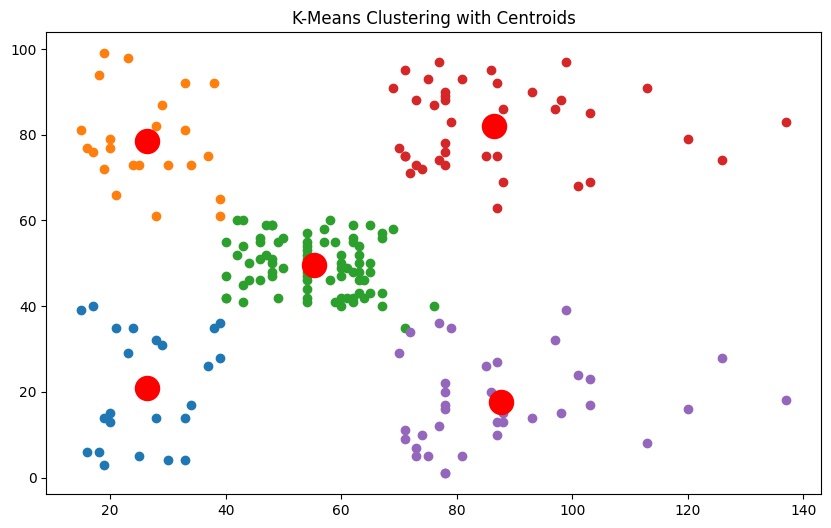

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mengambil kolom yang diperlukan
X = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-Means dengan 5 cluster
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)

# Melakukan clustering
df['label'] = kmeans.fit_predict(X)

# Memvisualisasikan data berdasarkan label cluster
plt.figure(figsize=(10,6))
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['Annual Income'], df[df['label'] == label]['Spending Score'], label=f'Cluster {label}')

# Memvisualisasikan posisi centroid
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Mengambil kolom yang diperlukan
X = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat list kosong untuk menampung nilai silhouette score
silhouette_scores = []

# Melakukan perulangan untuk nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan nilai silhouette score
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=2: 0.293166070535953
Silhouette Score for k=3: 0.3839349967742105
Silhouette Score for k=4: 0.40546302077733304
Silhouette Score for k=5: 0.44428597560893024
Silhouette Score for k=6: 0.4523443947724053
Silhouette Score for k=7: 0.4412807576186172
Silhouette Score for k=8: 0.4280971079746162
Silhouette Score for k=9: 0.40126260157691634
Silhouette Score for k=10: 0.3790978814868016


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

X = df[['Age', 'Annual Income', 'Spending Score']]

davies_bouldin_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    davies_bouldin = davies_bouldin_score(X, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

for k, score in zip(range(2, 11), davies_bouldin_scores):
    print(f"Davies Bouldin Score for k={k}: {score}")


Davies Bouldin Score for k=2: 1.3571023143309133
Davies Bouldin Score for k=3: 0.8748062648492879
Davies Bouldin Score for k=4: 0.8914904209843165
Davies Bouldin Score for k=5: 0.8218781633199781
Davies Bouldin Score for k=6: 0.746974007275528
Davies Bouldin Score for k=7: 0.7863764854525301
Davies Bouldin Score for k=8: 0.8641438876447516
Davies Bouldin Score for k=9: 0.9070119449899816
Davies Bouldin Score for k=10: 0.9573604236246045


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

X = df[['Age', 'Annual Income', 'Spending Score']]

calinski_harabasz_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    calinski_harabasz = calinski_harabasz_score(X, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz)

for k, score in zip(range(2, 11), calinski_harabasz_scores):
    print(f"Calinski-Harabasz Score for k={k}: {score}")


Calinski-Harabasz Score for k=2: 89.28096999467428
Calinski-Harabasz Score for k=3: 113.70507138642179
Calinski-Harabasz Score for k=4: 127.9838294818919
Calinski-Harabasz Score for k=5: 151.04386000160667
Calinski-Harabasz Score for k=6: 166.7204931788687
Calinski-Harabasz Score for k=7: 162.2852042279988
Calinski-Harabasz Score for k=8: 163.58062876554533
Calinski-Harabasz Score for k=9: 156.15508760692356
Calinski-Harabasz Score for k=10: 152.26426170758603
